<a href="https://colab.research.google.com/github/CST501-IIITKota/lab-repo-BharadwajDinesh/blob/main/StatsLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd


In [63]:
d1=pd.read_csv("/content/synthetic_dataset.csv")

In [64]:
d1.head()

,date,value1,value2,group,segment,risk_level
0,2023-01-01,54.967142,23.763754,C,X,NaN
1,2023-01-02,48.617357,72.821635,C,X,medium
2,2023-01-03,56.476885,36.778313,A,Y,NaN
3,2023-01-04,65.230299,63.230583,A,Y,medium
4,2023-01-05,47.658466,63.352971,A,X,low


In [65]:
import matplotlib.pyplot as plt

/tmp/ipython-input-1317798495.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([d1['value1'], d1['value2']], labels=['d1', 'd2'])


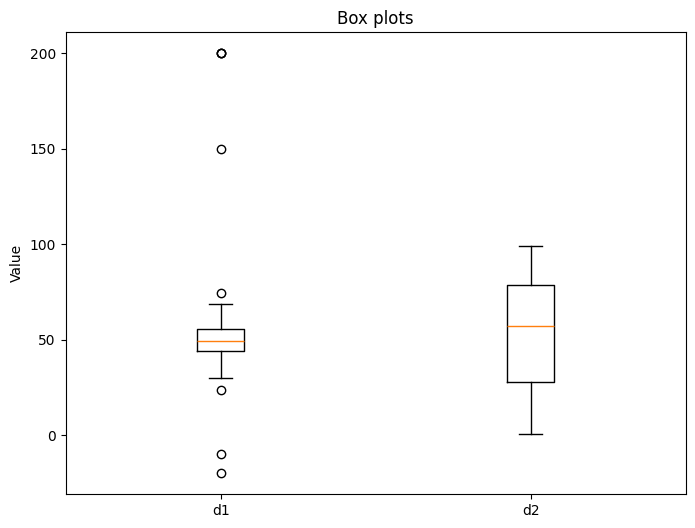

In [66]:
plt.figure(figsize=(8, 6))
plt.boxplot([d1['value1'], d1['value2']], labels=['d1', 'd2'])
plt.title('Box plots')
plt.ylabel('Value')
plt.show()


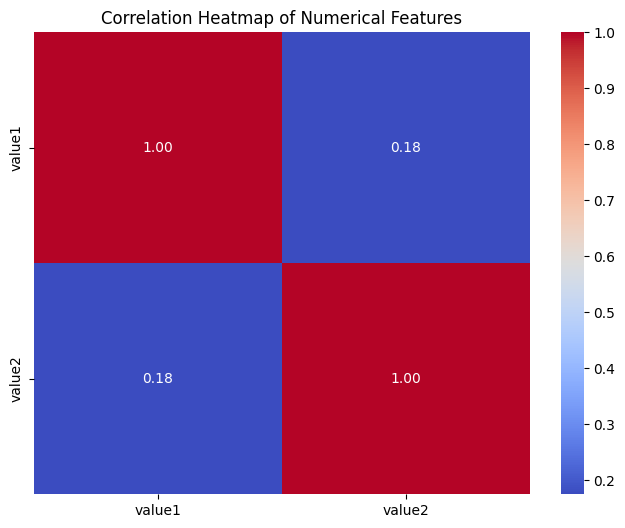

In [67]:
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_cols = d1.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x78bb8c9ace90>,
 'caps': [<matplotlib.lines.Line2D at 0x78bb8c9ae900>,
 'boxes': [<matplotlib.lines.Line2D at 0x78bb8c9af3e0>],
 'medians': [<matplotlib.lines.Line2D at 0x78bb8c9acf50>],
 'fliers': [<matplotlib.lines.Line2D at 0x78bb8c971310>],
 'means': []}

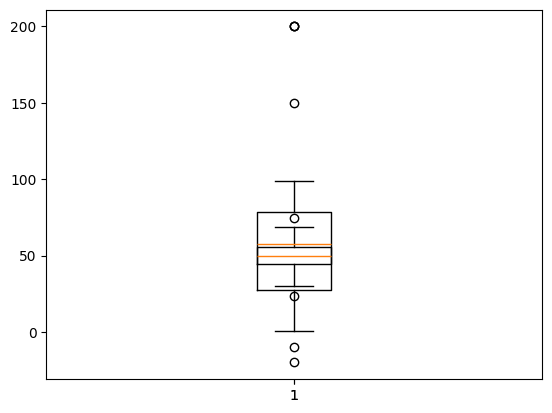

In [68]:
plt.plot
plt.boxplot(d1['value1'])
plt.boxplot(d1['value2'])

(array([31.,  0.,  0.,  0.,  0., 47.,  0.,  0.,  0., 42.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

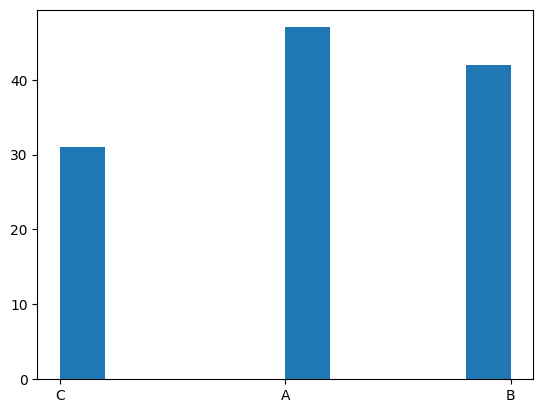

In [69]:
plt.hist(d1['group'])

(array([84.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 36.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

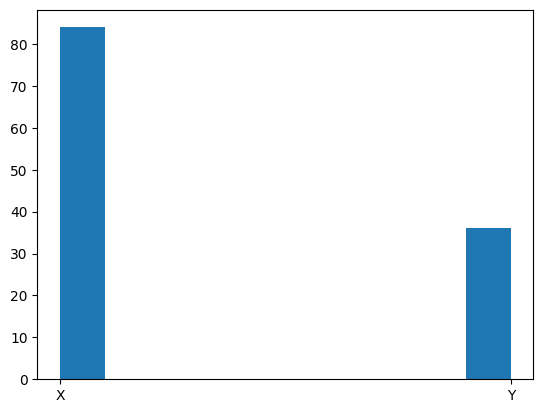

In [70]:
plt.hist(d1['segment'])

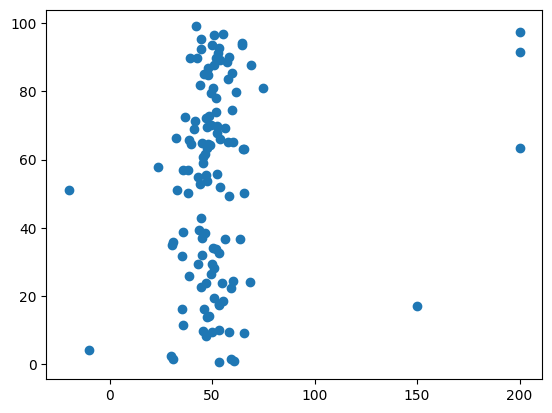

In [71]:
plt.scatter(d1['value1'],d1['value2'])

(array([48.,  0.,  0.,  0.,  0., 34.,  0.,  0.,  0., 14.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

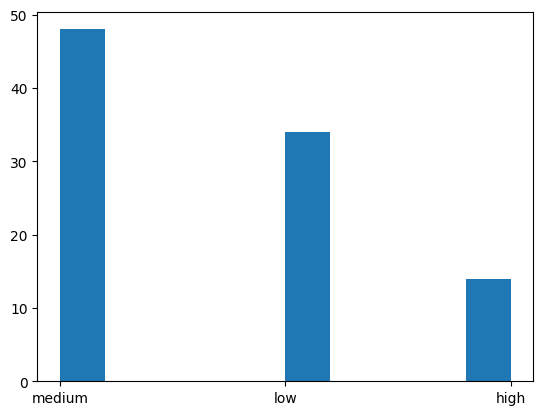

In [72]:
plt.hist(d1['risk_level'].dropna())

In [73]:
d1.dtypes

,0
date,object
value1,float64
value2,float64
group,object
segment,object
risk_level,object


# Dealing with outliers

In [74]:
Q1 = d1["value1"].quantile(0.25)
Q3 = d1["value1"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = d1[(d1["value1"] < lower_bound) | (d1["value1"] > upper_bound)]


In [75]:
outliers.shape

(8, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x78bb8cb6f170>,
 'caps': [<matplotlib.lines.Line2D at 0x78bb8cb6f440>,
 'boxes': [<matplotlib.lines.Line2D at 0x78bb8cb6fad0>],
 'medians': [<matplotlib.lines.Line2D at 0x78bb8cbae4b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78bb8cbae660>],
 'means': []}

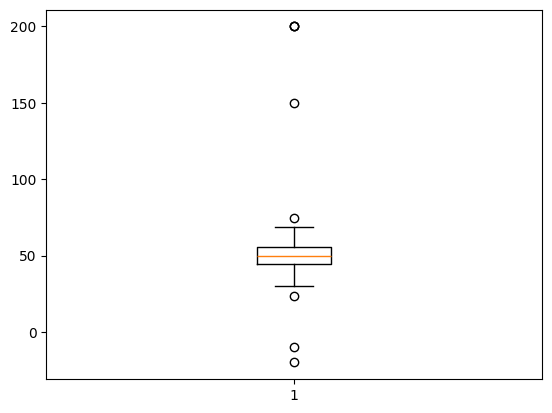

In [76]:
plt.boxplot(d1['value1'])

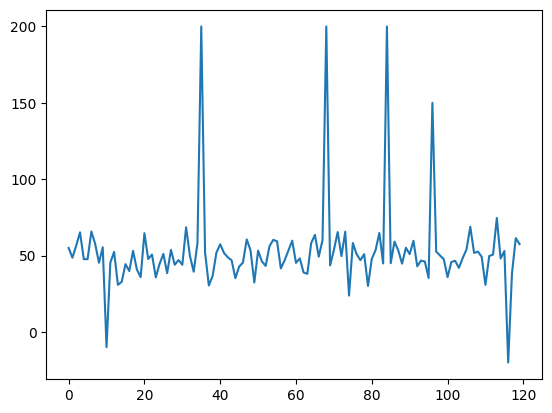

In [77]:
plt.plot(d1['value1'])

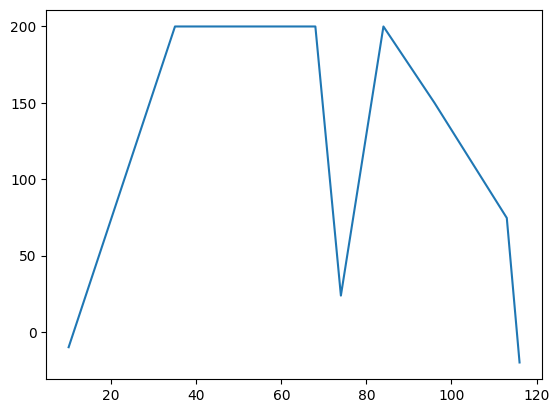

In [78]:
plt.plot(outliers['value1'])

In [79]:
data = d1.drop(outliers.index)

/tmp/ipython-input-3491096890.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([d1['value1'], data['value1']], labels=['d1', 'data'])


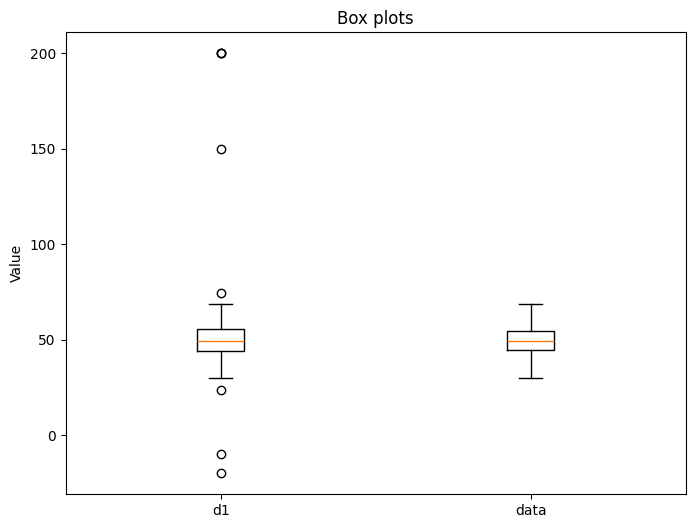

In [80]:
plt.figure(figsize=(8, 6))
plt.boxplot([d1['value1'], data['value1']], labels=['d1', 'data'])
plt.title('Box plots')
plt.ylabel('Value')
plt.show()

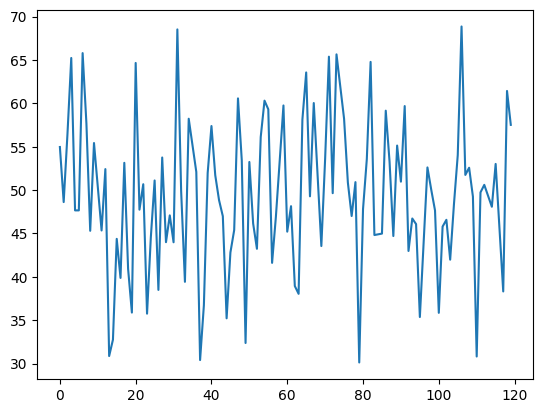

In [81]:
plt.plot(data['value1'])

# Removing outliers using Z-Score

In [82]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(d1["value1"]))
print(z_scores)
outliers2 = d1[z_scores > 3]


[0.07473479 0.15091649 0.12838631 0.43945495 0.18499243 0.1849866
 0.45942059 0.17094032 0.26861808 0.09102697 2.23399207 0.26728736
 0.01579598 0.78170105 0.714763   0.30160094 0.46170989 0.00989185
 0.42446478 0.60366982 0.41906352 0.18201548 0.07778433 0.60809219
 0.29523814 0.06236334 0.51080846 0.03172948 0.31522973 0.20544046
 0.31560923 0.55645939 0.10657821 0.47765875 0.19052474 5.22874415
 0.0275582  0.79818654 0.57377706 0.03182346 0.16064596 0.04088285
 0.14287947 0.20878446 0.6272017  0.3575916  0.26547818 0.2738861
 0.02032936 0.72831047 0.01338748 0.23862779 0.34233841 0.1155887
 0.26460292 0.22916579 0.4000131  0.21166603 0.01593883 0.24489618
 0.2720651  0.16775906 0.4949382  0.52687575 0.18696427 0.38018311
 0.12737184 0.25484215 5.22874415 0.33103689 0.02664685 0.44478786
 0.11451317 0.45424318 1.03275633 0.19029645 0.07084795 0.20803948
 0.06917284 0.80810089 0.17984617 0.0251248  0.42341511 0.28595858
 5.22874415 0.28009032 0.22352325 0.01504603 0.29004176 0.0806173

In [83]:
outliers2

,date,value1,value2,group,segment,risk_level
35,2023-02-05,200.0,63.310146,C,X,medium
68,2023-03-10,200.0,97.301055,A,Y,medium
84,2023-03-26,200.0,91.486439,B,X,medium
96,2023-04-07,150.0,16.949275,B,X,NaN


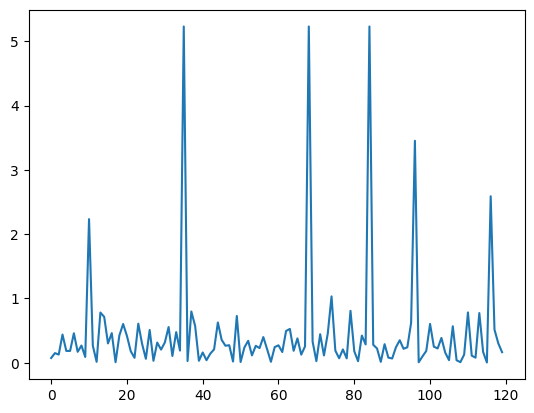

In [84]:
plt.plot(z_scores)

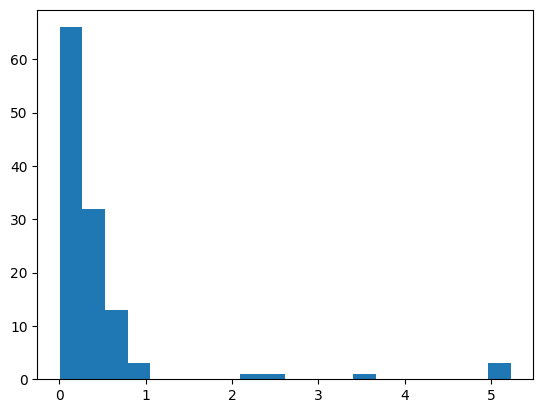

In [85]:
plt.hist(z_scores, bins=20)
plt.show()


(array([ 2.,  1., 37., 73.,  3.,  0.,  0.,  1.,  0.,  3.]),
 array([-20.,   2.,  24.,  46.,  68.,  90., 112., 134., 156., 178., 200.]),
 <BarContainer object of 10 artists>)

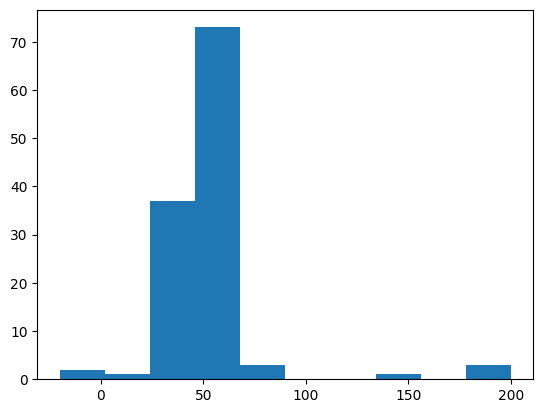

In [86]:
plt.hist(d1['value1'])

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([150., 155., 160., 165., 170., 175., 180., 185., 190., 195., 200.]),
 <BarContainer object of 10 artists>)

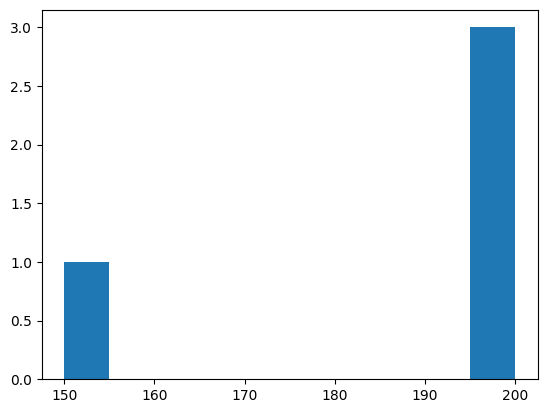

In [87]:
plt.hist(outliers2['value1'])

In [88]:
from sklearn.preprocessing import MinMaxScaler
d1_copy = d1.copy(deep=True)
scaler = MinMaxScaler()
d1_copy['value1_normalized'] = scaler.fit_transform(d1[['value1']])

print("Original d1['value1'] stats:")
print(d1['value1'].describe())
print("\nNormalized d1['value1_normalized'] stats:")
print(d1_copy['value1_normalized'].describe())

Original d1['value1'] stats:
count    120.000000
mean      52.864119
std       28.257800
min      -20.000000
25%       44.281247
50%       49.460819
75%       55.598391
max      200.000000
Name: value1, dtype: float64

Normalized d1['value1_normalized'] stats:
count    120.000000
mean       0.331201
std        0.128445
min        0.000000
25%        0.292187
50%        0.315731
75%        0.343629
max        1.000000
Name: value1_normalized, dtype: float64


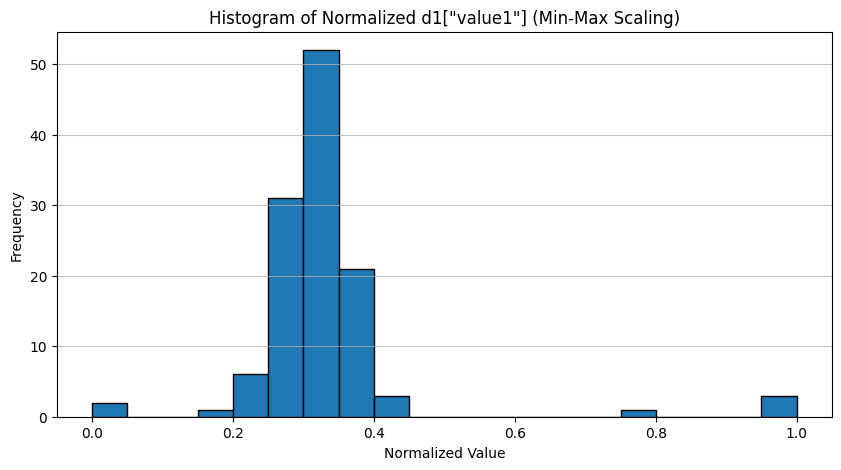

In [89]:
plt.figure(figsize=(10, 5))
plt.hist(d1_copy['value1_normalized'], bins=20, edgecolor='black')
plt.title('Histogram of Normalized d1[\"value1\"] (Min-Max Scaling)')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## data type correction

In [90]:
d1.columns

Index(['date', 'value1', 'value2', 'group', 'segment', 'risk_level'], dtype='object')

In [91]:
d1.dtypes

,0
date,object
value1,float64
value2,float64
group,object
segment,object
risk_level,object


In [92]:
d1_copy['group'] = d1_copy['group'].astype('category')

In [93]:
d1_copy.dtypes

,0
date,object
value1,float64
value2,float64
group,category
segment,object
risk_level,object
value1_normalized,float64


/tmp/ipython-input-696641765.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='group', data=d1_copy, palette='viridis')


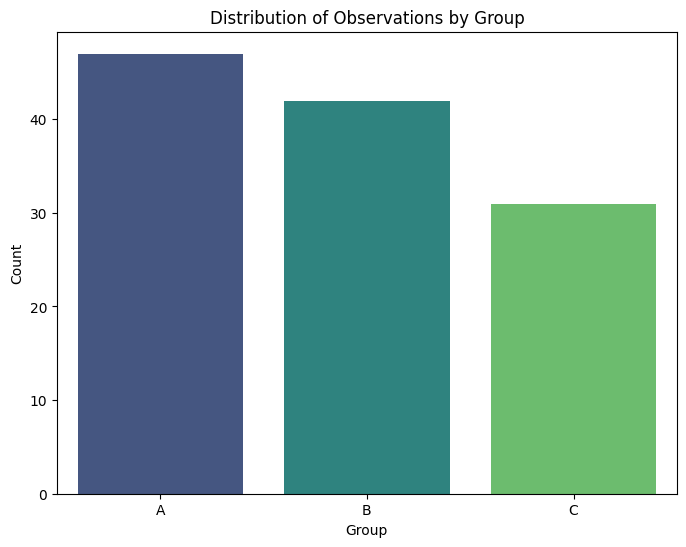

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='group', data=d1_copy, palette='viridis')
plt.title('Distribution of Observations by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3923829439.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='risk_level', y='value1', data=d1_copy.dropna(subset=['risk_level']), palette='coolwarm')


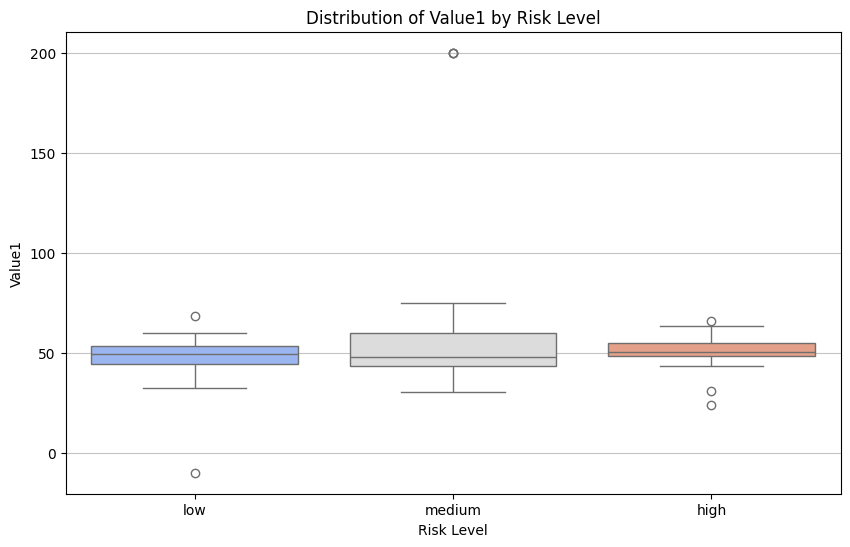

In [95]:
# Convert 'risk_level' to an ordered categorical type
# Define the order of the categories
risk_level_order = ['low', 'medium', 'high']
d1_copy['risk_level'] = pd.Categorical(d1_copy['risk_level'], categories=risk_level_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='risk_level', y='value1', data=d1_copy.dropna(subset=['risk_level']), palette='coolwarm')
plt.title('Distribution of Value1 by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Value1')
plt.grid(axis='y', alpha=0.75)
plt.show()

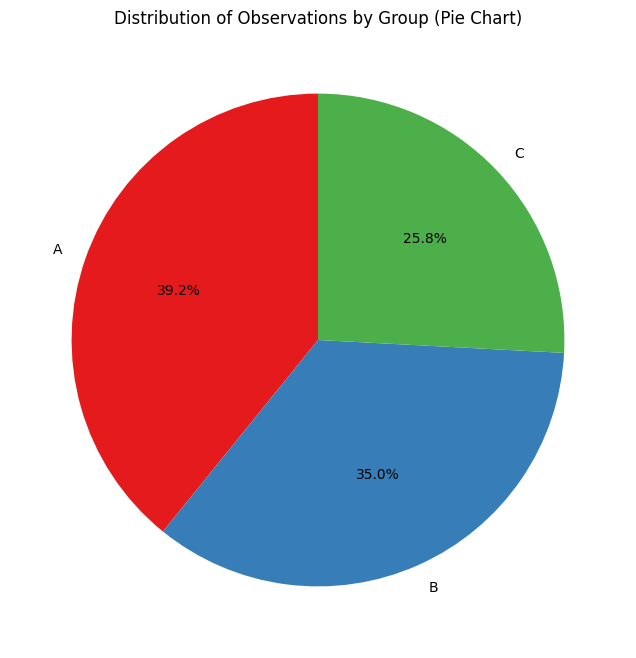

In [96]:
import matplotlib.pyplot as plt

# Calculate the value counts for the 'group' column
group_counts = d1_copy['group'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title('Distribution of Observations by Group (Pie Chart)')
plt.ylabel('') # Hide the y-label for pie chart
plt.show()

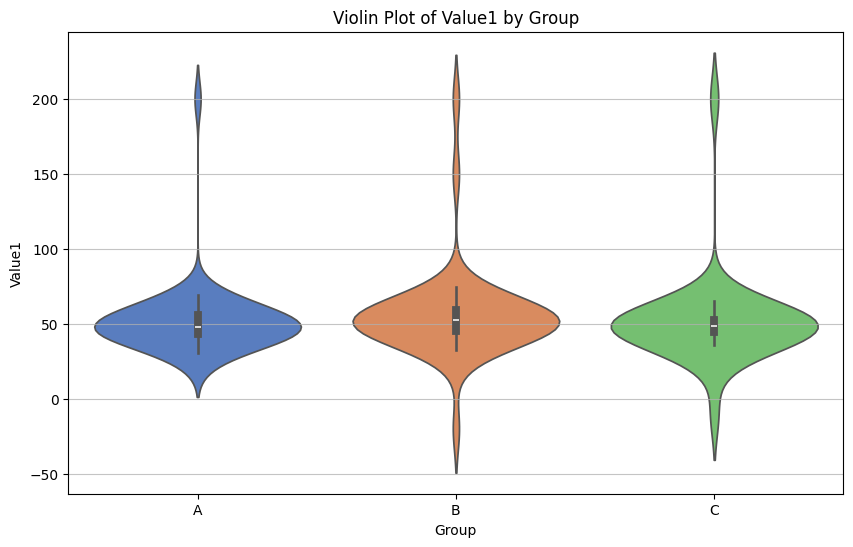

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='group', y='value1', data=d1_copy, hue='group', legend=False, palette='muted')
plt.title('Violin Plot of Value1 by Group')
plt.xlabel('Group')
plt.ylabel('Value1')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [98]:
d1.loc[115]

,115
date,2023-04-26
value1,53.015473
value2,91.324055
group,B
segment,X
risk_level,low


In [99]:
d1.loc[(d1['value1'] > 50) & (d1['group']=='C')]

,date,value1,value2,group,segment,risk_level
0,2023-01-01,54.967142,23.763754,C,X,NaN
12,2023-01-13,52.419623,67.756436,C,Y,high
17,2023-01-18,53.142473,17.436643,C,Y,medium
35,2023-02-05,200.000000,63.310146,C,X,medium
39,2023-02-09,51.968612,89.711026,C,X,high
71,2023-03-13,65.380366,63.113863,C,X,medium
75,2023-03-17,58.219025,49.251769,C,X,NaN
78,2023-03-20,50.917608,28.077236,C,X,NaN
87,2023-03-29,53.287511,92.831856,C,X,low
98,2023-04-09,50.051135,93.615477,C,X,low


In [100]:
d1.iloc[0]

,0
date,2023-01-01
value1,54.967142
value2,23.763754
group,C
segment,X
risk_level,NaN


In [101]:
d1.iloc[0:3, 1]

,value1
0,54.967142
1,48.617357
2,56.476885


In [102]:
grouped_data = d1.groupby('group')['value1'].agg(['mean', 'count', 'min', 'max'])
display(grouped_data)

,mean,count,min,max
group,,,,
A,51.557677,47,23.802549,200.0
B,55.709850,42,-20.000000,200.0
C,50.989346,31,-10.000000,200.0


In [103]:
display(d1.groupby('group')['value1'])

In [104]:
display(grouped_data)

,mean,count,min,max
group,,,,
A,51.557677,47,23.802549,200.0
B,55.709850,42,-20.000000,200.0
C,50.989346,31,-10.000000,200.0


In [105]:
indexed_d1 = d1.set_index(['group', 'segment'])
display(indexed_d1)

date     value1     value2 risk_level
group segment                                             
C     X        2023-01-01  54.967142  23.763754        NaN
      X        2023-01-02  48.617357  72.821635     medium
A     Y        2023-01-03  56.476885  36.778313        NaN
      Y        2023-01-04  65.230299  63.230583     medium
      X        2023-01-05  47.658466  63.352971        low
...                   ...        ...        ...        ...
B     X        2023-04-26  53.015473  91.324055        low
      X        2023-04-27 -20.000000  51.134240        NaN
      X        2023-04-28  38.313220  50.151629     medium
      X        2023-04-29  61.428228  79.829518     medium
C     X        2023-04-30  57.519330  64.996393       high

[120 rows x 4 columns]

In [106]:
d1.head()

,date,value1,value2,group,segment,risk_level
0,2023-01-01,54.967142,23.763754,C,X,NaN
1,2023-01-02,48.617357,72.821635,C,X,medium
2,2023-01-03,56.476885,36.778313,A,Y,NaN
3,2023-01-04,65.230299,63.230583,A,Y,medium
4,2023-01-05,47.658466,63.352971,A,X,low


In [107]:
index = d1.set_index(['group','risk_level'])
index.head()

date     value1     value2 segment
group risk_level                                          
C     NaN         2023-01-01  54.967142  23.763754       X
      medium      2023-01-02  48.617357  72.821635       X
A     NaN         2023-01-03  56.476885  36.778313       Y
      medium      2023-01-04  65.230299  63.230583       Y
      low         2023-01-05  47.658466  63.352971       X

In [108]:
import pandas as pd

# Create a small DataFrame manually
new_data = {
    'group': ['A', 'B', 'C', 'D'],
    'additional_info': ['Info_A', 'Info_B', 'Info_C', 'Info_D']
}
df_additional = pd.DataFrame(new_data)

display("Additional DataFrame:", df_additional.head())

'Additional DataFrame:'

,group,additional_info
0,A,Info_A
1,B,Info_B
2,C,Info_C
3,D,Info_D


In [109]:
# Merge d1 with the new DataFrame based on the 'group' column
merged_df = pd.merge(d1, df_additional, on='group', how='left')

display("Merged DataFrame:", merged_df.head())

'Merged DataFrame:'

,date,value1,value2,group,segment,risk_level,additional_info
0,2023-01-01,54.967142,23.763754,C,X,NaN,Info_C
1,2023-01-02,48.617357,72.821635,C,X,medium,Info_C
2,2023-01-03,56.476885,36.778313,A,Y,NaN,Info_A
3,2023-01-04,65.230299,63.230583,A,Y,medium,Info_A
4,2023-01-05,47.658466,63.352971,A,X,low,Info_A


# Statistical Analysis

In [110]:
numerical_cols = d1.select_dtypes(include=['float64', 'int64'])

print("--- Statistical Summary ---")
for col in numerical_cols.columns:
    print(f"\nColumn: {col}")
    print(f"  Mean: {numerical_cols[col].mean():.2f}")
    print(f"  Median: {numerical_cols[col].median():.2f}")

    # Mode can return multiple values if there's a tie, so handle it.
    mode_val = numerical_cols[col].mode()
    if not mode_val.empty:
        print(f"  Mode: {list(mode_val.round(2))}")
    else:
        print("  Mode: No unique mode found")

    print(f"  Variance: {numerical_cols[col].var():.2f}")
    print(f"  Standard Deviation: {numerical_cols[col].std():.2f}")


--- Statistical Summary ---

Column: value1
  Mean: 52.86
  Median: 49.46
  Mode: [200.0]
  Variance: 798.50
  Standard Deviation: 28.26

Column: value2
  Mean: 53.25
  Median: 57.35
  Mode: [0.51, 0.92, 1.55, 1.66, 2.43, 4.08, 8.41, 9.03, 9.31, 9.37, 9.72, 10.15, 11.35, 13.75, 14.01, 16.08, 16.16, 16.95, 17.44, 17.71, 18.65, 19.52, 22.43, 22.65, 23.72, 23.76, 24.19, 24.4, 25.79, 26.52, 28.08, 29.36, 29.44, 31.69, 32.08, 32.54, 33.9, 34.11, 34.92, 35.95, 36.77, 36.78, 37.02, 38.51, 38.67, 39.31, 42.82, 49.25, 50.15, 50.26, 51.13, 51.21, 51.83, 52.97, 53.58, 54.87, 55.52, 55.68, 56.83, 57.01, 57.69, 59.09, 60.64, 61.5, 63.11, 63.23, 63.31, 63.35, 64.2, 64.52, 64.55, 64.96, 65.0, 65.2, 65.76, 66.0, 66.35, 67.76, 69.09, 69.19, 69.6, 69.7, 70.25, 71.22, 72.25, 72.6, 72.82, 74.08, 74.65, 77.99, 79.48, 79.83, 80.94, 81.01, 81.72, 83.53, 84.92, 85.11, 85.3, 86.71, 87.73, 87.74, 88.71, 89.2, 89.71, 89.72, 89.86, 90.04, 91.32, 91.49, 92.47, 92.83, 93.62, 93.67, 94.05, 95.39, 96.36, 96.67, 97.3,

In [111]:
from scipy.stats import shapiro

In [112]:
stat, p = shapiro(d1['value1'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.549, p=0.000


In [113]:
d1['value1'].mean()

np.float64(52.86411865054594)

In [114]:
from scipy.stats import ttest_1samp

In [115]:
help(ttest_1samp)

Help on function ttest_1samp in module scipy.stats._stats_py:

ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)
    Calculate the T-test for the mean of ONE group of scores.

    This is a test for the null hypothesis that the expected value
    (mean) of a sample of independent observations `a` is equal to the given
    population mean, `popmean`.

    Parameters
    ----------
    a : array_like
        Sample observations.
    popmean : float or array_like
        Expected value in null hypothesis. If array_like, then its length along
        `axis` must equal 1, and it must otherwise be broadcastable with `a`.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan

In [116]:
ttest_1samp(d1['value1'], 50)

TtestResult(statistic=np.float64(1.110307522618157), pvalue=np.float64(0.26910504611496994), df=np.int64(119))

In [117]:
top_5_value1 = d1['value1'].value_counts().head(5)
display(top_5_value1)

,count
value1,
200.000000,3
54.967142,1
56.476885,1
65.230299,1
47.658466,1


In [118]:
from scipy.stats import f_oneway

# Extract the 'value1' data for each group
group_a = d1[d1['group'] == 'A']['value1']
group_b = d1[d1['group'] == 'B']['value1']
group_c = d1[d1['group'] == 'C']['value1']

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(group_a, group_b, group_c)

print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
alpha = 0.05 # Significance level
if p_value < alpha:
    print(f"Since p-value ({p_value:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the mean of 'value1' among the groups (A, B, C).")
else:
    print(f"Since p-value ({p_value:.3f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in the mean of 'value1' among the groups (A, B, C).")

F-statistic: 0.328
P-value: 0.721
Since p-value (0.721) >= alpha (0.05), we fail to reject the null hypothesis.
Conclusion: There is no statistically significant difference in the mean of 'value1' among the groups (A, B, C).


In [119]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U Test
statistic, p_value = mannwhitneyu(d1['value1'], d1['value2'])

print(f"Mann-Whitney U Statistic: {statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
alpha = 0.05 # Significance level
if p_value < alpha:
    print(f"Since p-value ({p_value:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the distributions of 'value1' and 'value2'.")
else:
    print(f"Since p-value ({p_value:.3f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant difference in the distributions of 'value1' and 'value2'.")

Mann-Whitney U Statistic: 6340.000
P-value: 0.110
Since p-value (0.110) >= alpha (0.05), we fail to reject the null hypothesis.
Conclusion: There is no statistically significant difference in the distributions of 'value1' and 'value2'.


In [120]:
from scipy.stats import zscore

d1_zscore_normalized = d1.copy(deep=True)

numerical_cols = d1.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    d1_zscore_normalized[f'{col}_zscore'] = zscore(d1_zscore_normalized[col])

display(d1_zscore_normalized.head())

,date,value1,value2,group,segment,risk_level,value1_zscore,value2_zscore
0,2023-01-01,54.967142,23.763754,C,X,NaN,0.074735,-1.020896
1,2023-01-02,48.617357,72.821635,C,X,medium,-0.150916,0.677840
2,2023-01-03,56.476885,36.778313,A,Y,NaN,0.128386,-0.570239
3,2023-01-04,65.230299,63.230583,A,Y,medium,0.439455,0.345729
4,2023-01-05,47.658466,63.352971,A,X,low,-0.184992,0.349967


In [ ]:
plt.hi

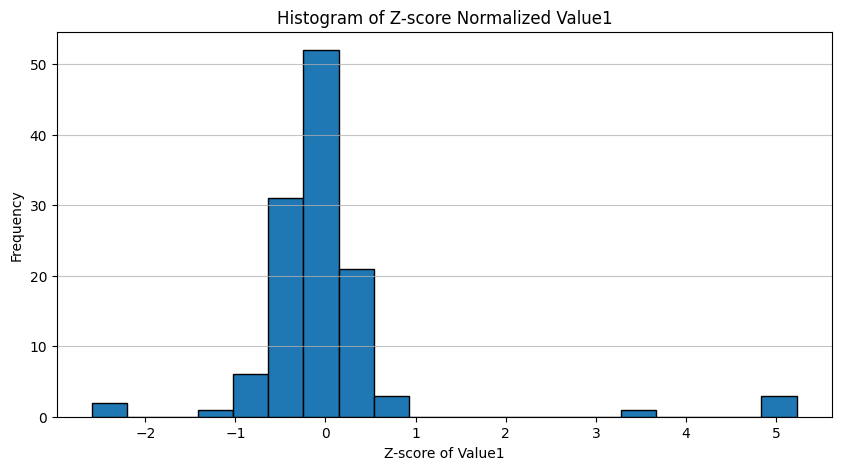

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(d1_zscore_normalized['value1_zscore'], bins=20, edgecolor='black')
plt.title('Histogram of Z-score Normalized Value1')
plt.xlabel('Z-score of Value1')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [122]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(d1['group'], d1['segment'])
display("Contingency Table:", contingency_table)

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square Statistic: {chi2:.3f}")
print(f"P-value: {p_value:.3f}")
print(f"Degrees of Freedom: {dof}")

# Interpret the result
alpha = 0.05 # Significance level
if p_value < alpha:
    print(f"Since p-value ({p_value:.3f}) < alpha ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant relationship between 'group' and 'segment'.")
else:
    print(f"Since p-value ({p_value:.3f}) >= alpha ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is no statistically significant relationship between 'group' and 'segment'.")

'Contingency Table:'

segment,X,Y
group,,
A,32,15
B,27,15
C,25,6



Chi-square Statistic: 2.408
P-value: 0.300
Degrees of Freedom: 2
Since p-value (0.300) >= alpha (0.05), we fail to reject the null hypothesis.
Conclusion: There is no statistically significant relationship between 'group' and 'segment'.
